In [167]:
import numpy as np

In [188]:
#rng=np.random.default_rng(1000) # for newer version of numpy
rnd = np.random
rnd.seed(0)


In [189]:
n = 20  # numbre of clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

In [190]:
import matplotlib.pyplot as plt


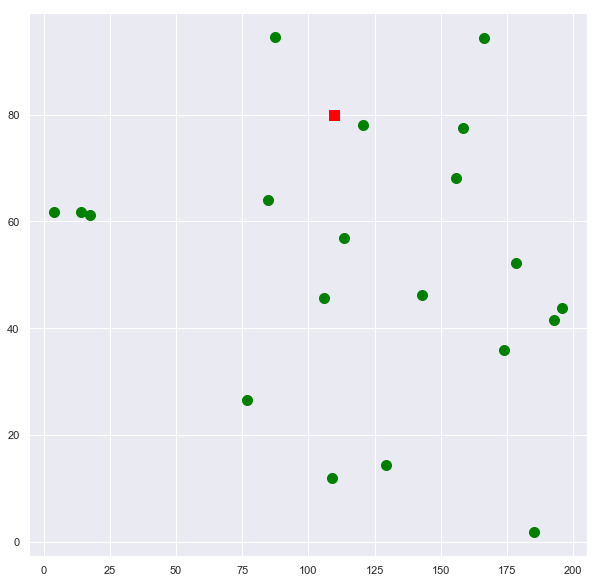

In [191]:

ax,fig=plt.subplots(figsize=(10,10))
ax=plt.scatter(xc[1:],yc[1:],color='green',s=100)
ax=plt.scatter(xc[0],yc[0],color='red',s=100,marker='s')


In [192]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q = 20
q = {i: np.random.randint(1, 10) for i in N}

In [193]:
c

{(0, 1): 47.40790586561482,
 (0, 2): 10.949615934912947,
 (0, 3): 68.0929511435712,
 (0, 4): 29.667389572120314,
 (0, 5): 68.39438133152815,
 (0, 6): 26.581650720227508,
 (0, 7): 73.98552807869795,
 (0, 8): 91.44601012402701,
 (0, 9): 62.864289563525155,
 (0, 10): 48.646202635532305,
 (0, 11): 34.53138387060961,
 (0, 12): 23.39084914373536,
 (0, 13): 108.48214271725871,
 (0, 14): 97.26437037760557,
 (0, 15): 94.21261722265783,
 (0, 16): 107.27800051040168,
 (0, 17): 58.57390936425601,
 (0, 18): 47.345703952853654,
 (0, 19): 77.84388110136851,
 (0, 20): 93.27724685556718,
 (1, 0): 47.40790586561482,
 (1, 2): 39.03219145977668,
 (1, 3): 48.353532729480385,
 (1, 4): 60.97631021921289,
 (1, 5): 34.700364265871485,
 (1, 6): 73.60190024386914,
 (1, 7): 35.82897305757807,
 (1, 8): 49.91472542110819,
 (1, 9): 69.21022328961175,
 (1, 10): 34.820411448914804,
 (1, 11): 37.26270010697212,
 (1, 12): 31.31224336899458,
 (1, 13): 61.07855011778083,
 (1, 14): 129.77359809189306,
 (1, 15): 126.5117811

In [194]:
N

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [195]:
V

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [196]:
from gurobipy import Model, GRB, quicksum

In [197]:
mdl=Model('CVRP')

In [210]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [211]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [212]:
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>}

In [213]:
mdl.Params.MIPGap=0.1
mdl.Params.TimeLimit=60
mdl.optimize()

Parameter MIPGap unchanged
   Value: 0.1  Min: 0.0  Max: 1e+100  Default: 0.0001
Parameter TimeLimit unchanged
   Value: 60.0  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 240 rows, 880 columns and 2520 nonzeros
Model has 1140 general constraints
Variable types: 40 continuous, 840 integer (840 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]

MIP start did not produce a new incumbent solution
MIP start violates constraint R80 by 1.000000000

Presolve added 750 rows and 0 columns
Presolve removed 0 rows and 250 columns
Presolve time: 0.08s
Presolved: 990 rows, 630 columns, 5794 nonzeros
Variable types: 210 continuous, 420 integer (420 binary)

Root relaxation: objective 4.516618e+02, 77 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node

In [214]:
arcs_used= [a for a in A if x[a].x > 0.99]
arcs_used

[(0, 2),
 (0, 6),
 (0, 7),
 (0, 9),
 (0, 12),
 (0, 17),
 (1, 0),
 (2, 0),
 (3, 5),
 (4, 0),
 (5, 1),
 (6, 16),
 (7, 20),
 (8, 13),
 (9, 3),
 (10, 18),
 (11, 4),
 (12, 11),
 (13, 19),
 (14, 15),
 (15, 0),
 (16, 14),
 (17, 10),
 (18, 0),
 (19, 0),
 (20, 8)]

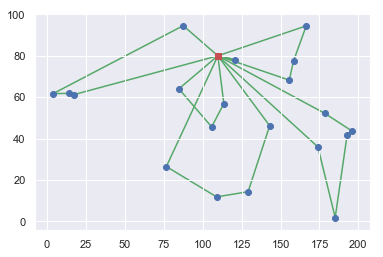

In [215]:
for i, j in arcs_used:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')